(bayes-workflow-notebook)=
# Modellazione bayesiana

L'obiettivo di questo Capitolo è di introdurre il quadro concettuale dela modellizzazione bayesiana.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import uniform

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Esplorazione dei Fondamenti dei Metodi Bayesiani in Psicologia

### Introduzione ai Principi Bayesiani

Nel campo della psicologia, l'adozione dei metodi bayesiani ha guadagnato crescente attenzione e utilizzo. La formalizzazione dell'uso delle probabilità, un elemento centrale dell'approccio bayesiano, permette di rappresentare numericamente insiemi di convinzioni razionali e di aggiornare queste convinzioni in base a nuove informazioni attraverso la regola di Bayes. Questo processo, noto come inferenza bayesiana, è particolarmente rilevante in psicologia dove le incertezze e le informazioni parziali sono la norma.

### Crescita dei Metodi Bayesiani nella Psicologia

Il paradigma bayesiano in psicologia ha visto un notevole aumento di interesse grazie alla disponibilità di risorse educative e pubblicazioni che facilitano l'integrazione dei modelli bayesiani nell'analisi dei dati psicologici. Autori come {cite:t}`brooks2003bayesian`, {cite:t}`van2017systematic`, {cite:t}`doing_bayesian_data_an`, {cite:t}`McElreath_rethinking`, {cite:t}`Johnson2022bayesrules`), hanno contribuito a questa evoluzione, fornendo agli psicologi una solida base per applicare approcci bayesiani ai dati psicologici.

### Il Ciclo Continuo dell'Apprendimento Bayesiano

Il framework bayesiano costituisce un modello matematico che cattura il processo di apprendimento continuo. Fondato sul teorema di Bayes, questo ciclo iterativo consente l'aggiornamento sequenziale delle informazioni, in cui la distribuzione a posteriori di un ciclo diventa la distribuzione a priori del ciclo successivo. Questa dinamica di aggiornamento costante delle credenze gioca un ruolo cruciale nell'ambito della ricerca e della creatività, come sottolineato {cite:p}`wagenmakers2018creativity`.

### Dalla Generazione dei Dati alla Modellizzazione Bayesiana

Nel contesto dell'inferenza bayesiana, uno degli aspetti centrali riguarda l'analisi dei processi generativi dei dati, noti come "Data-Generating Processes" (DGP), che sono responsabili della produzione dei dati osservati. L'identificazione di questi meccanismi sottostanti, anche se non direttamente osservabili, riveste un'importanza fondamentale per la comprensione e la rappresentazione delle ipotesi sulla realtà attraverso l'utilizzo di modelli statistici.

### Riallocazione della Credibilità e Aggiornamento Sequenziale

La dinamica dell'aggiornamento delle informazioni nel contesto bayesiano è stata esemplificata attraverso l'uso dell'esempio di Sherlock Holmes. Come dimostrato nel libro {cite:t}`doing_bayesian_data_an`, questo processo si basa sull'idea che acquisire nuove prove in un'indagine può portare all'esclusione di una causa tra molte possibili, con conseguente redistribuzione delle probabilità tra le cause rimanenti.

Per comprendere meglio questo concetto, consideriamo un'indagine su un crimine con quattro possibili colpevoli, identificati come A, B, C e D. Inizialmente, tutte e quattro le opzioni hanno probabilità simili di essere il colpevole. Tuttavia, man mano che Sherlock Holmes raccoglie nuove prove e informazioni, potrebbe essere in grado di escludere uno dei sospettati, diciamo il colpevole A, sulla base di queste nuove prove. Quando ciò avviene, la probabilità associata a A viene annullata e riallocata tra i rimanenti sospettati, ossia B, C e D. Di conseguenza, la probabilità di ciascuno di loro come colpevole diventa più elevata e, inizialmente, tutti hanno probabilità uguali. Questo processo rappresenta l'essenza dell'aggiornamento bayesiano delle credenze.

Tuttavia, è importante notare che in psicologia e in molti altri contesti, raramente un'ipotesi o una causa viene completamente esclusa. Piuttosto, la sua credibilità viene ridimensionata o modificata in base alle nuove evidenze, aumentando la plausibilità delle alternative. Questo principio è espressamente sintetizzato nella famosa citazione di Dennis Lindley: "Il posterior di oggi diventa il prior di domani". In altre parole, ciò che impariamo oggi influenzerà le nostre credenze future e il processo di aggiornamento continuo delle nostre conoscenze.

Questa dinamica di riallocazione della credibilità e aggiornamento sequenziale è fondamentale nel contesto dell'applicazione dei metodi bayesiani, inclusi quelli utilizzati nella psicologia, per valutare e rivedere costantemente le nostre ipotesi in base alle nuove evidenze a disposizione.

## La Modellizzazione Statistica: Collegamento tra Teoria e Dati

La modellizzazione statistica bayesiana svolge un ruolo fondamentale nel collegare la teoria psicologica con i dati empirici. Questo approccio suddivide la complessità dei fenomeni psicologici in componenti più gestibili, rendendo più agevole la comprensione e la simulazione dei comportamenti o dei processi in esame. Tuttavia, la modellizzazione richiede una sinergia tra conoscenza settoriale e competenze statistiche. Questa sinergia è cruciale per tradurre teorie e dati empirici in modelli computazionali efficaci, che possano catturare in modo accurato e significativo i fenomeni psicologici oggetto di studio.

### Elementi Fondamentali della Modellazione Statistica Bayesiana

I concetti chiave essenziali per comprendere la modellazione statistica bayesiana sono i seguenti:

1. **Variabili Casuali**: Queste rappresentano componenti essenziali in qualsiasi modello statistico bayesiano, fungendo da rappresentazioni quantitative di elementi sconosciuti o incerti. Le variabili casuali sono utilizzate per modellare e stabilire relazioni tra diverse grandezze all'interno del modello. Ciò consente di esprimere in termini probabilistici sia le osservazioni (dati) sia i parametri del modello.

2. **Distribuzioni Statistiche**: Nel contesto bayesiano, le distribuzioni statistiche sono fondamentali per strutturare e quantificare l'incertezza. In particolare:
   - **Distribuzioni Priori**: Queste sono centrali nella modellazione bayesiana. Le distribuzioni priori esprimono le conoscenze o le convinzioni iniziali relative alle variabili incognite prima dell'analisi dei dati. Queste distribuzioni sono poi aggiornate in base alle informazioni ottenute dai dati.
   - **Distribuzioni Posteriori**: Sono il risultato dell'aggiornamento delle credenze priori alla luce dei dati osservati. Rappresentano la sintesi delle informazioni originali (priori) e quelle nuove (dati), offrendo una visione aggiornata delle stime del modello.

3. **Aggiornamento Bayesiano**: Questo processo rappresenta il cuore dell'inferenza bayesiana. Utilizzando il teorema di Bayes, le distribuzioni priori vengono aggiornate in base ai dati osservati. L'aggiornamento bayesiano consente di combinare le informazioni preesistenti con nuove evidenze, per affinare le stime dei parametri del modello e ridurre l'incertezza associata. Questo processo iterativo si adatta continuamente all'arrivo di nuove informazioni, permettendo una comprensione sempre più precisa dei fenomeni studiati.

Questi elementi, insieme, formano il quadro metodologico della modellazione statistica bayesiana, consentendo di interpretare dati complessi e incerti in modo flessibile e informato.

### Il Processo di Sviluppo di un Modello Bayesiano

La costruzione di un modello bayesiano si articola in tre fasi principali:

1. **Progettazione del Modello**: In questa fase iniziale, il modello viene progettato sulla base delle conoscenze preliminari e delle ipotesi relative al meccanismo generativo dei dati.
2. **Esecuzione dell'Inferenza Bayesiana**: In questo stadio, si applica il teorema di Bayes per rivedere e aggiornare le credenze priori alla luce dei dati osservati, portando alla formulazione di una distribuzione a posteriori.
3. **Analisi e Confronto dei Modelli**: In questa fase finale, si valuta l'adeguatezza del modello, esaminando la sua coerenza e affidabilità attraverso diversi criteri. Se necessario, si confronta il modello con altre alternative per determinare quale sia il più appropriato.

Nei successivi capitoli, approfondiremo ciascuna di queste fasi, delineando il processo standard adottato nel flusso di lavoro bayesiano {cite:p}`baribault2023troubleshooting`.

## Riesame del Teorema di Bayes

Prima di discutere il flusso di lavoro bayesiano, esaminiamo nuovamente il teorema di Bayes. Il teorema di Bayes rappresenta un pilastro fondamentale della statistica bayesiana, fornendo il meccanismo attraverso il quale le credenze iniziali (priori) vengono aggiornate alla luce di nuovi dati. Per approfondire la comprensione di questo teorema, è essenziale esaminarne la formulazione sia in termini di probabilità discrete che di distribuzioni di densità di probabilità. La formula chiave del teorema di Bayes è la seguente:

$$
p(\theta \mid \text{data}) = \frac{p(\text{data} \mid \theta)p(\theta)}{p(\text{data})} \propto p(\text{data} \mid \theta)p(\theta),
$$

dove:
- $\theta$ rappresenta un insieme di parametri (ad esempio, coefficienti di regressione).
- $p(\theta \mid \text{data})$ è la distribuzione posteriore dei parametri, ottenuta aggiornando la distribuzione a priori $p(\theta)$ con i dati osservati, espressi nella funzione di verosimiglianza $p(\text{data} \mid \theta)$.
- $p(\text{data})$, la probabilità marginale dei dati, funge da costante di normalizzazione per assicurare che la distribuzione posteriore sommi a 1. 

Nella statistica Bayesiana, le convinzioni aggiornate (posteriori) sui parametri sono utilizzate per l'inferenza. Per esempio, la distribuzione posteriore può essere riassunta per calcolare la probabilità che un parametro rientri in un determinato intervallo. 

La specificità dell'inferenza bayesiana è legata all'utilizzo delle distribuzioni a priori, indicate con $p(\theta)$. Di solito, i ricercatori basano queste distribuzioni a priori su risultati precedenti, meta-analisi e/o l'expertise di esperti, oppure, in modo ancora più comune, utilizzano distribuzioni non informative note come "distribuzioni di regolarizzazione". Un aspetto cruciale, che come vedremo rappresenta un notevole vantaggio, è che l'effetto delle distribuzioni a priori è più significativo quando il campione di dati è di dimensioni ridotte. In questa situazione, l'impiego di una distribuzione a priori "di regolarizzazione" ha un impatto conservativo sull'inferenza statistica, contribuendo a mitigare le fluttuazioni dovute alla limitata dimensione del campione.

Passando al contesto della modellazione, consideriamo una variabile casuale $ Y $, che assume un valore realizzato $ y $. Ad esempio, il punteggio di uno studente in un esame di Psicometria può essere modellato come $ Y $, con un insieme di possibili valori. Una volta ottenuto il voto, $ Y $ si realizza come $ y $. Per modellare come i dati effettivi $ y $ sono stati ottenuti, dobbiamo specificare un modello di probabilità, noto come *processo generatore di dati* (DGP).

Denotiamo con $ \theta $ un parametro che caratterizza il modello di probabilità di interesse, che può essere uno scalare (come la media o la varianza di una distribuzione) o un vettore (ad esempio, un insieme di coefficienti di regressione). Nell'inferenza statistica, l'obiettivo è stimare questi parametri sconosciuti dai dati. La principale differenza tra l'inferenza frequentista e quella bayesiana è nella concezione di $ \theta $: nella prima, $ \theta $ è fisso ma sconosciuto; nella seconda, è considerato una variabile casuale con una distribuzione di probabilità a priori.

Nell'inferenza bayesiana, calcoliamo la probabilità congiunta di parametri e dati come funzione della distribuzione condizionale dei dati dati i parametri e della distribuzione a priori dei parametri. La distribuzione posteriore di $ \theta $ dato $ y $ si ottiene moltiplicando la distribuzione dei dati $ p(y \mid \theta) $ per la distribuzione a priori $ p(\theta) $, normalizzata per $ p(y) $. In modelli complessi con molti parametri, la distribuzione posteriore è difficile da valutare, richiedendo metodi computazionali avanzati. 

Possiamo esprimere la distribuzione congiunta dei parametri e dei dati come:

$$ 
\begin{equation}
p(\theta, y) = p(y \mid \theta)p(\theta). 
\end{equation}
$$ (eq-prob-congiunta-bayes)

Utilizzando il teorema di Bayes dell'eq. {eq}`eq-bayes-cont` otteniamo:

$$ 
\begin{equation}
p(\theta \mid y) = \frac{p(\theta, y)}{p(y)} = \frac{p(y \mid \theta)p(\theta)}{p(y)}.
\end{equation}
$$ (eq-bayes-revisited)

In questa formulazione, $ p(y \mid \theta) $ è la funzione di verosimiglianza, e l'equazione sopra rappresenta l'essenza dell'inferenza statistica bayesiana, differenziandola dalla statistica frequentista.

Per variabili discrete,

$$ 
p(y) = \sum_\theta p(y \mid \theta)p(\theta)  
$$

e per variabili continue,

$$ 
p(y) = \int p(y \mid \theta)p(\theta)d\theta.
$$

La validità dell'approccio bayesiano è sostenuta dai lavori di Cox e Savage, che hanno dimostrato che, se $p(\theta)$ e $p(y \mid \theta)$ rappresentano convinzioni razionali, la regola di Bayes è il metodo ottimale per aggiornarle alla luce di nuove informazioni.

## L'aggiornamento bayesiano

Per offrire una illustrazione quantitativa del procedimento di aggiornamento bayesiano, prendiamo in considerazione un esempio pratico: la localizzazione di un aeromobile disperso in mare. In questo capitolo, ci concentriamo esclusivamente sulla comprensione della struttura logica del problema e sulla sua formalizzazione tramite l'impiego di distribuzioni di probabilità. In questa fase, tralasciamo i dettagli implementativi e mettiamo invece l'accento sul significato delle diverse fasi e degli obiettivi del processo di aggiornamento bayesiano. Successivamente, esamineremo le metodologie per conseguire tali obiettivi, approfondendo gli aspetti di natura computazionale.

L'illustrazione coinvolge un ipotetico scenario in cui un aereo è disperso nell'Oceano Pacifico. Ci troviamo in un contesto in cui la latitudine è determinata, ma la longitudine rimane ignota (disponiamo unicamente dell'indicazione della direzione del viaggio, senza conoscere la distanza percorsa). L'obiettivo principale è rifinire la stima della posizione approssimata ($\theta$) dell'aereo. Per raggiungere questo fine, gli operatori di soccorso raccolgono dati dai frammenti dei detriti che sono stati individuati.

Iniziamo il processo con una stima iniziale, definita come *distribuzione a priori*. Questa distribuzione di probabilità rappresenta il nostro grado di conoscenza sulla posizione dell'aereo prima di ricevere ulteriori dati o informazioni.

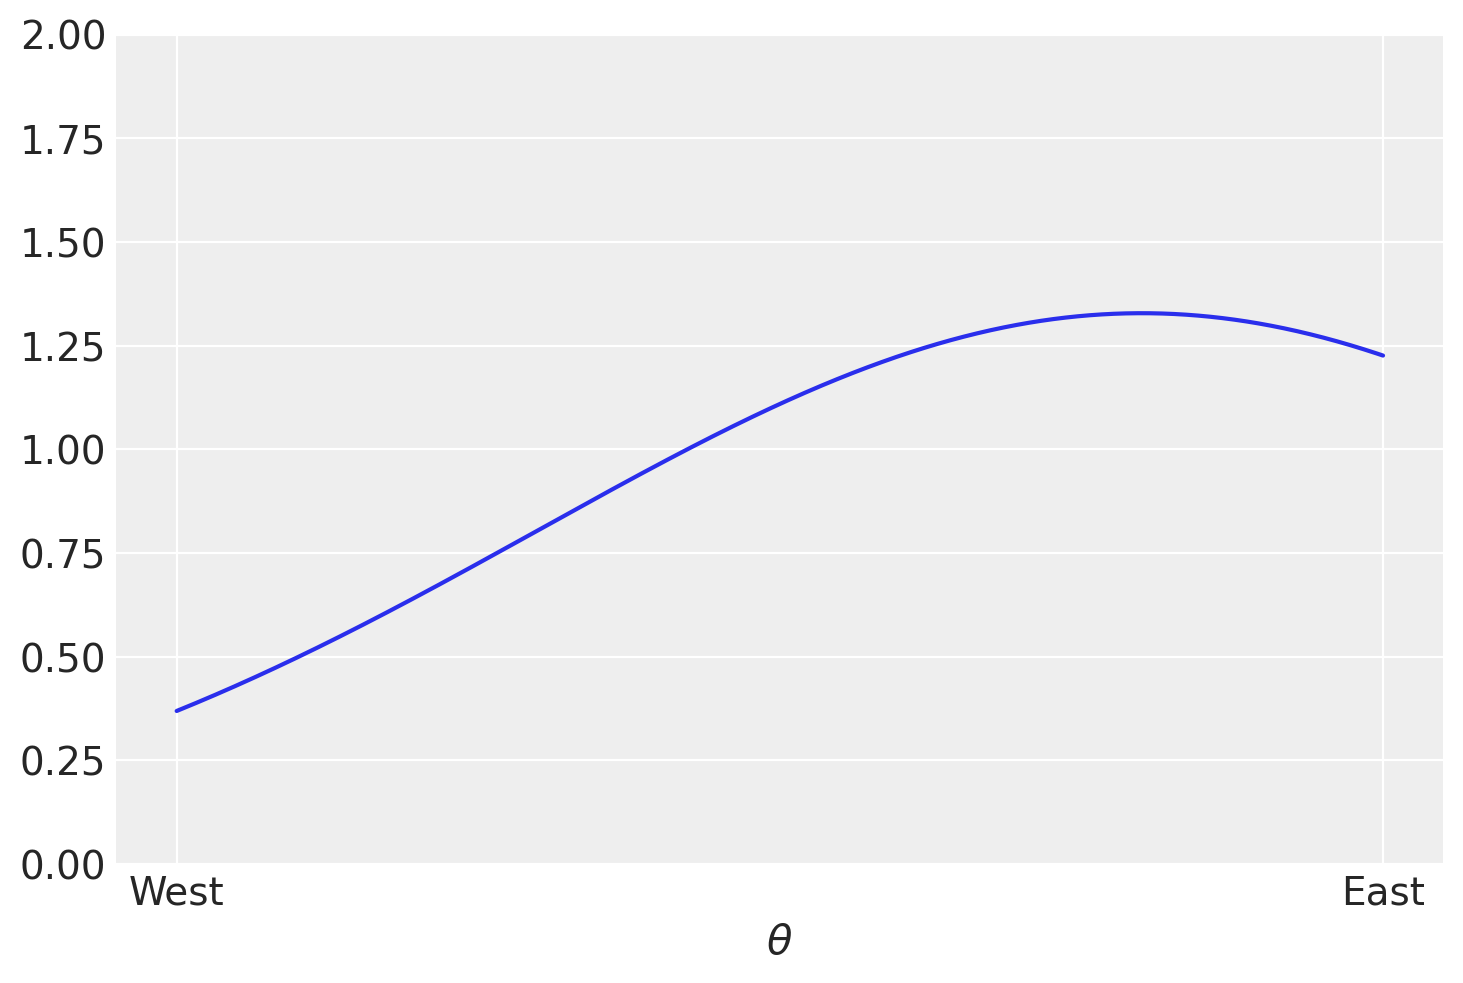

In [3]:
def dnorm_trunc(x, mean=0, sd=1, ll=0, ul=1):
    out = norm.pdf(x, mean, sd) / (norm.cdf(ul, mean, sd) - norm.cdf(ll, mean, sd))
    out[(x > ul) | (x < ll)] = 0
    return out

# Data points for x-axis
x_vals = np.linspace(0, 1, 1000)

# Parameters for the dnorm_trunc function
mean_val = 0.8
sd_val = 0.5

# Calculate the y values using dnorm_trunc function
y_vals = dnorm_trunc(x_vals, mean_val, sd_val)

# Plot the curve
plt.plot(x_vals, y_vals)
plt.ylim(0, 2)
plt.xlabel(r"$\theta$")
plt.ylabel("")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Nel contesto bayesiano, una distribuzione di probabilità assume il compito di rappresentare l'incertezza o le convinzioni che nutriamo riguardo ai molteplici valori possibili che un parametro può assumere. Nel caso attuale, il parametro $\theta$ indica la longitudine associata alla posizione dell'aereo disperso nell'oceano Pacifico. La posizione esatta dell'aereo rimane sconosciuta. Tuttavia, formuliamo delle ipotesi iniziali sulle possibili localizzazioni. Per ogni valore possibile di $\theta$, la distribuzione di probabilità attribuisce un livello di fiducia che rispecchia quanto riteniamo probabile che quel valore specifico rappresenti il vero valore del parametro. I valori di $\theta$ associati a ordinate più elevate nella funzione indicano un grado superiore di fiducia, in quanto riteniamo che tali valori siano più propensi a rappresentare il vero valore del parametro. In contrasto, i valori di $\theta$ associati a ordinate più basse denotano convinzioni più deboli.

Sull'asse $x$ del grafico sopra riportato sono indicati i valori di $\theta$, cioè i diversi possibili valori della longitudine dell'aereo. Le estremità dell'asse delle ascisse sono etichettate come "West" (Ovest) e "East" (Est), per indicare che $\theta$ spazia da ovest a est. Lungo l'asse delle ordinate ($y$), sono tracciati i valori delle densità di probabilità associati a ciascun valore di $\theta$. 

Nel nostro caso specifico, la distribuzione a priori è centrata intorno a $\theta = 0.8$, suggerendo una previsione iniziale che l'aereo sia più verosimilmente situato ad est. Tuttavia, permangono incertezze considerevoli riguardo alla posizione esatta. Possiamo affermare, comunque, che inizialmente riteniamo che sia due volte più probabile che l'aereo si trovi ad est rispetto a ovest.

La scelta della distribuzione a priori rispecchia le convinzioni del ricercatore riguardo al problema in questione. Di conseguenza, diversi ricercatori potrebbero formulare diverse distribuzioni a priori per lo stesso problema, e tale diversità è accettabile, a patto che tali distribuzioni siano ragionevolmente giustificate. Nel prosieguo, scopriremo che nelle analisi Bayesiane, anche con campioni di dimensioni moderate, le varie distribuzioni a priori generano solitamente differenze trascurabili.

Ora, supponiamo di aver raccolto dei detriti nelle posizioni mostrate nel grafico seguente.

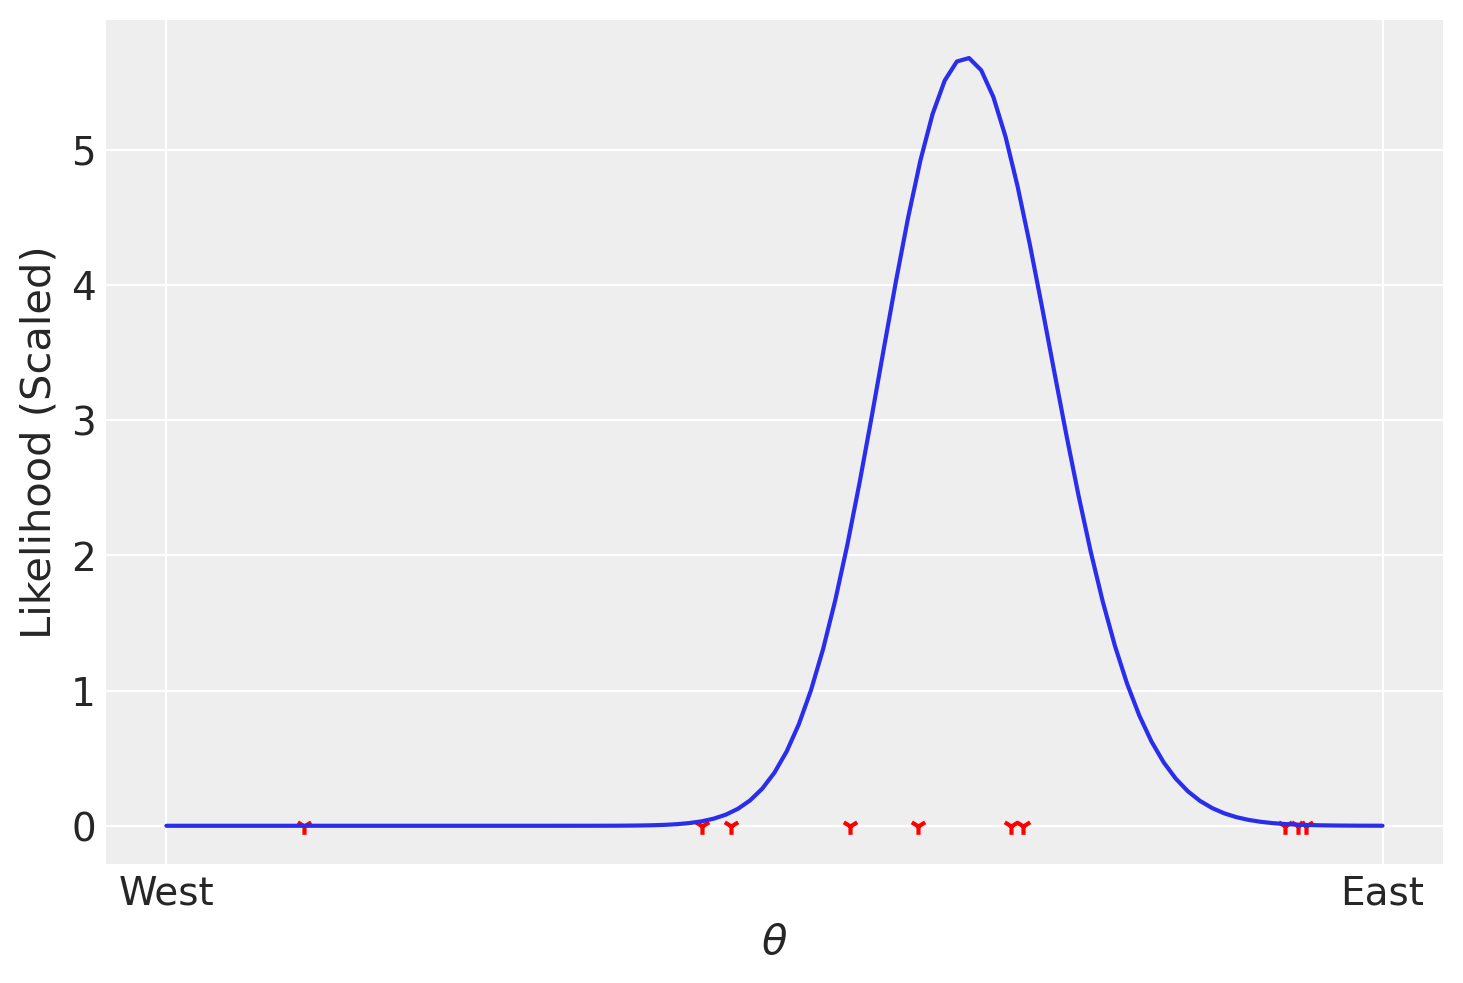

In [4]:
def qnorm_trunc(p, mean=0, sd=1, ll=0, ul=1):
    cdf_ll = norm.cdf(ll, loc=mean, scale=sd)
    cdf_ul = norm.cdf(ul, loc=mean, scale=sd)
    return norm.ppf(cdf_ll + p * (cdf_ul - cdf_ll), loc=mean, scale=sd)


def rnorm_trunc(n, mean=0, sd=1, ll=0, ul=1):
    p = np.random.uniform(size=n)
    return qnorm_trunc(p, mean=mean, sd=sd, ll=ll, ul=ul)


grid = np.linspace(0, 1, num=101)


def compute_lik(x, pts=grid, sd=0.2, binwidth=0.01):
    lik_vals = norm.pdf(x[:, np.newaxis], loc=pts, scale=sd) / (
        norm.cdf(1, loc=pts, scale=sd) - norm.cdf(0, loc=pts, scale=sd)
    )
    lik = np.prod(lik_vals, axis=0)
    return lik / np.sum(lik) / binwidth


np.random.seed(4)
dat_x = rnorm_trunc(10, mean=0.6, sd=0.2)
lik_x = compute_lik(dat_x)

plt.plot(grid, lik_x)
plt.scatter(dat_x, np.zeros_like(dat_x), color="red", marker="1")
plt.xlabel(r"$\theta$")
plt.ylabel("Likelihood (Scaled)")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Dal Teorema di Bayes, è possibile derivare la distribuzione a posteriori attraverso il seguente procedimento:

$$
\text{Probabilità a posteriori} \propto \text{Probabilità a priori} \times
                                       \text{Verosimiglianza}.
$$

In altre parole, è sufficiente moltiplicare le probabilità a priori e la verosimiglianza al fine di ottenere la probabilità posteriore per ciascuna posizione. È importante garantire che l'area sotto la curva sia normalizzata a 1. Questo processo è conosciuto come *aggiornamento bayesiano*.

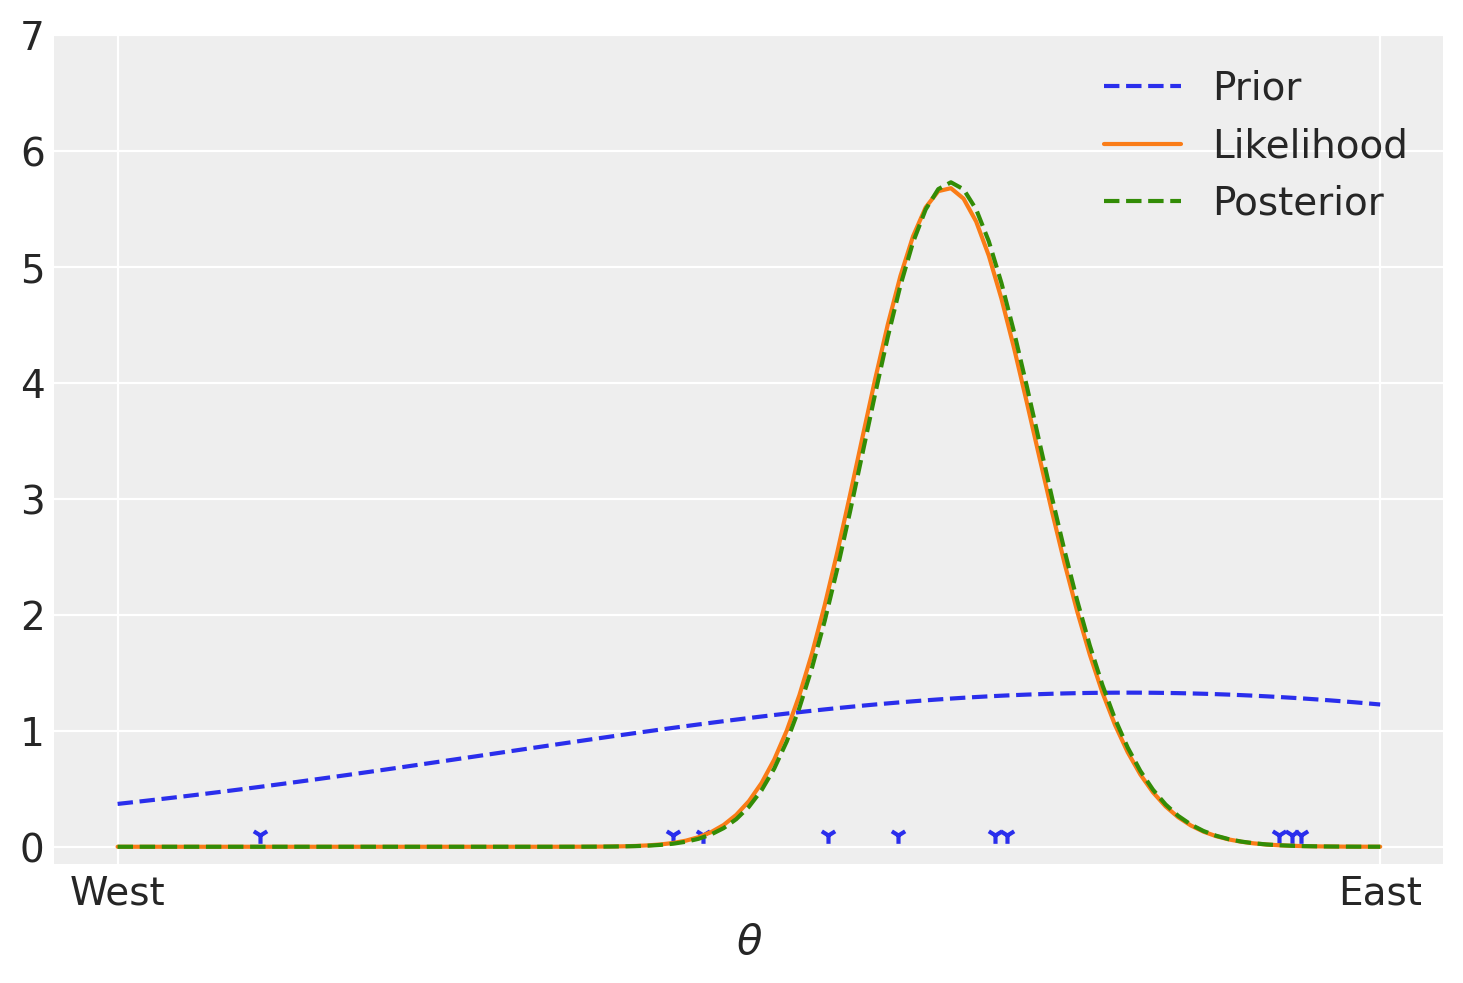

In [13]:
def update_probs(prior_probs, lik, binwidth=0.01):
    post_probs = prior_probs * lik
    return post_probs / np.sum(post_probs) / binwidth

grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.5)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.5), linestyle='dashed', label='Prior')
plt.plot(grid, lik_x, linestyle='solid', label='Likelihood')
plt.plot(grid, posterior_probs, linestyle='dashed', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x)+.1, marker='1')
plt.ylim(-0.15, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([-0, 1], ["West", "East"])
plt.legend()
plt.show()

In questa situazione, è evidente che una distribuzione a priori come quella descritta in precedenza, che definiremo "debolmente informativa", ha un impatto trascurabile e la distribuzione a posteriori risulta quasi indistinguibile dalla verosimiglianza (che è stata normalizzata).

Ora, esamineremo come si comporta una distribuzione a priori maggiormente informativa.

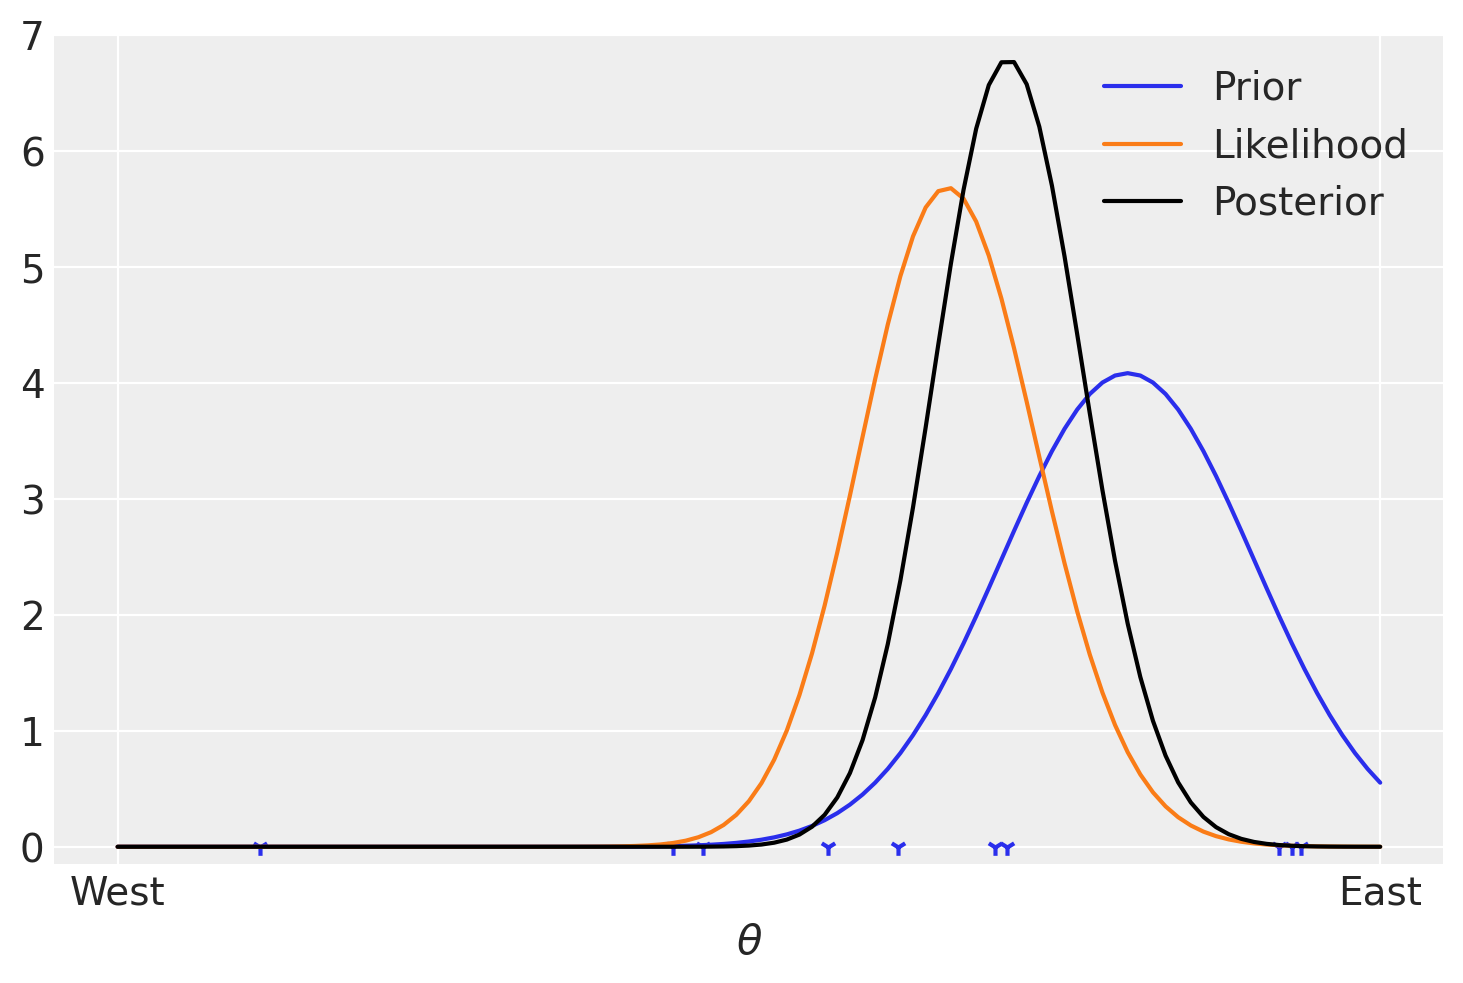

In [11]:
grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.1)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.1), label='Prior')
plt.plot(grid, lik_x, linestyle='solid', label='Likelihood')
plt.plot(grid, posterior_probs, color='black', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x), marker='1')
plt.ylim(-0.15, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([0, 1], ["West", "East"])
plt.legend()
plt.show()

Il grafico illustra le tre distribuzioni coinvolte nell'aggiornamento bayesiano.

1. La curva tratteggiata rossa rappresenta la distribuzione a priori di $\theta$. Questa curva riflette le nostre credenze iniziali o le aspettative riguardo ai possibili valori di $\theta$ prima di effettuare qualsiasi osservazione. Nel nostro esempio, la distribuzione a priori è una distribuzione normale con una media di 0.8 e una deviazione standard di 0.1. Questo implica che, prima di raccogliere dati, prevediamo che il valore di $\theta$ sia prossimo a 0.8, con una limitata variazione intorno a questa media.

2. La curva continua blu rappresenta la verosimiglianza dei dati osservati dato un valore specifico di $\theta$. In altre parole, essa descrive quanto i dati osservati supportano ogni possibile valore di $\theta$. La forma della curva indica quale valore di $\theta$ risulta più plausibile in base a ciò che è stato osservato. Maggiore è l'altezza della curva in un determinato punto, maggiore è il supporto fornito dai dati a quel valore di $\theta$.

3. La curva tratteggiata nera rappresenta la distribuzione a posteriori di $\theta$. Questa curva rappresenta la nostra stima aggiornata di $\theta$ dopo aver incorporato i dati osservati e le credenze iniziali attraverso il calcolo bayesiano. La distribuzione a posteriori combina la distribuzione a priori con la verosimiglianza dei dati, fornendo una stima più precisa e informativa di $\theta$. In sostanza, essa riflette la nostra comprensione aggiornata del valore di $\theta$ più probabile, tenendo conto sia delle informazioni iniziali che dei dati osservati.

   - Il valore di $\theta$ più probabile nella distribuzione a posteriori corrisponde al punto in cui la curva raggiunge l'apice, ovvero il valore di $\theta$ in cui la densità è massima. Questo punto rappresenta la stima del parametro $\theta$ che appare più plausibile alla luce dei dati osservati e delle credenze iniziali.
   - Inoltre, la distribuzione a posteriori fornisce indicazioni sulla nostra incertezza riguardo al valore di $\theta$. Se la distribuzione a posteriori è concentrata attorno a un valore specifico di $\theta$ e presenta un picco netto, ciò suggerisce che siamo più sicuri nella stima di $\theta$ e l'incertezza è ridotta. In altre parole, i dati osservati sono informativi e hanno ridotto l'incertezza sul valore di $\theta$. Invece, se la distribuzione a posteriori è ampia e ha una forma meno definita, implica maggiore incertezza nella stima di $\theta$. Questo può accadere quando i dati osservati sono scarsi o poco informativi, oppure se la distribuzione a priori era ampia, consentendo una vasta gamma di valori di $\theta$. In sintesi, la forma della distribuzione a posteriori riflette quanto i dati raccolti ci abbiano aiutato a restringere le possibili valutazioni di $\theta$.

## Linguaggi di programmazione probabilistici

La precedente illustrazione evidenzia il problema al quale la modellazione bayesiana mira a rispondere, nonché la soluzione proposta per affrontarlo. Finora, abbiamo delineato il concetto dell'aggiornamento bayesiano senza ancora approfondire i dettagli computazionali, i quali saranno esaminati in dettaglio nei capitoli successivi.

È fondamentale notare che l'attuale statistica bayesiana si avvale ampiamente di un linguaggio di programmazione probabilistico, noto come "Probabilistic Programming Language" (PPL), implementato su computer per eseguire l'aggiornamento bayesiano. Questo approccio ha rivoluzionato il modo in cui vengono condotte le analisi statistiche bayesiane, anche solo pochi decenni fa. L'adozione di tali metodi computazionali ha semplificato la formulazione di modelli statistici complessi, abbassando il livello di competenze matematiche e computazionali richieste, rendendo il processo di modellazione bayesiana più accessibile. Inoltre, questi strumenti hanno aperto nuove opportunità per affrontare problemi di analisi dei dati che, in passato, sarebbero stati notevolmente complessi da trattare.

### Notazione

Per chiarire la notazione, nel seguito utilizzeremo $y$ per rappresentare i dati e $\theta$ per indicare i parametri sconosciuti di un modello statistico. Entrambi, $y$ e $\theta$, saranno trattati come variabili casuali. Utilizzeremo invece $x$ per denotare le quantità note, come ad esempio i predittori di un modello lineare.

Al fine di rappresentare in modo più conciso i modelli probabilistici, adotteremo una notazione specifica. Ad esempio, anziché scrivere $p(\theta) = Beta(1, 1)$, scriveremo semplicemente $\theta \sim Beta(1, 1)$. Il simbolo "$\sim$" viene comunemente letto come "segue la distribuzione di". Possiamo anche interpretarlo nel senso che $\theta$ è un campione casuale estratto dalla distribuzione Beta(1, 1). Analogamente, la verosimiglianza di un modello binomiale sarà espressa come $y \sim \text{Bin}(n, \theta)$.

## La Distribuzione a Priori

Come anticipato precedentemente, l'approccio bayesiano si distingue per l'utilizzo delle distribuzioni a priori dei parametri sconosciuti oggetto dell'inferenza. In modo intuitivo, l'impiego delle distribuzioni a priori riflette il fatto che nessuno studio viene condotto in assenza totale di conoscenze acquisite da ricerche precedenti. L'analisi statistica bayesiana richiede semplicemente che tali conoscenze pregresse vengano esplicitate, per poi essere confrontate con i dati effettivamente disponibili. Le distribuzioni a priori rappresentano direttamente le nostre assunzioni riguardo ai valori plausibili dei parametri del modello.

### Distribuzioni a Priori Non Informative

Le distribuzioni a priori possono variare in base al grado di certezza con cui il ricercatore attribuisce credibilità a un particolare intervallo di valori dei parametri. Un caso estremo è rappresentato dalle distribuzioni a priori *non informative*, che indicano una completa mancanza di conoscenza pregressa e assegnano lo stesso grado di credibilità a tutti i valori dei parametri. Questi tipi di priori sono anche noti come priori vaghi o diffusi. Una delle distribuzioni a priori non informative più evidenti è la distribuzione di probabilità uniforme su un intervallo sensato di valori dei parametri. L'adozione della distribuzione uniforme si basa sul *Principio della Ragione Insufficiente*, formulato per la prima volta da Laplace (1774/1951), il quale sostiene che in assenza di evidenze rilevanti (pregresse), le proprie credenze dovrebbero essere distribuite in modo uniforme tra tutti gli esiti possibili.

### Distribuzioni a Priori Debolmente Informative

Le distribuzioni a priori debolmente informative sono distribuzioni di probabilità che consentono di incorporare meno informazioni di quanto sia effettivamente disponibile in una specifica situazione. Queste distribuzioni a priori contengono un intervallo di valori dei parametri che riflettono le assunzioni ragionevoli su di essi, ma tengono anche conto delle incertezze presenti in un'analisi. Questo approccio risulta particolarmente utile nel processo di stabilizzazione delle stime di un modello. L'inferenza bayesiana può richiedere notevoli risorse computazionali, soprattutto quando si trattano modelli gerarchici complessi. Pertanto, l'uso di informazioni a priori debolmente informative può contribuire a migliorare la stabilità dell'analisi senza influenzare in modo significativo le conclusioni derivate da essa.

### Distribuzioni a Priori Informativa

Ricerche precedenti, opinioni esperte, o entrambe, possono essere utilizzate in modo sistematico per affrontare un problema e possono essere incorporate nelle distribuzioni a priori. Questi tipi di priori sono noti come distribuzioni a priori informative. Queste distribuzioni riflettono informazioni concrete e rilevanti che possono avere un impatto significativo sull'analisi, fornendo una solida base di conoscenza su cui basare l'inferenza bayesiana. Le distribuzioni a priori informative possono derivare da una varietà di fonti e offrono un approccio strutturato per integrare la conoscenza pregressa nel processo di analisi statistica, migliorando la robustezza e l'accuratezza delle conclusioni derivate dai dati.

## La Verosimiglianza Marginale

La formula completa della distribuzione a posteriori può essere espressa nel seguente modo:

$$
p(\theta \mid y) = \frac{p(y \mid \theta) p(\theta)}{\int_{\Theta}p(y \mid \theta) p(\theta) \,d\theta} \quad \text{per} \quad \theta \in \Theta, 
$$ (eq-bayes-complete)

dove $\Theta$ rappresenta l'insieme dei possibili valori del parametro $\theta$.

Per calcolare $p(\theta \mid y)$, è necessario dividere il prodotto tra la distribuzione a priori e la verosimiglianza per una costante di normalizzazione. Questa costante, nota come *verosimiglianza marginale*, viene introdotta per assicurare che l'area sotto la curva di $p(\theta \mid y)$ sia unitaria. Tuttavia, l'integrale presente al denominatore della formula {eq}`eq-bayes-complete` spesso risulta complesso da risolvere analiticamente. Di conseguenza, l'inferenza bayesiana procede generalmente mediante metodi di approssimazione numerica.

## Metodi di Estimazione della Distribuzione a Posteriori

Esistono due principali strategie per calcolare la distribuzione a posteriori:

1. **Metodo Esatto**: Questo approccio è applicabile quando la distribuzione a priori e la funzione di verosimiglianza appartengono alla stessa classe di distribuzioni, note come *distribuzioni a priori coniugate*. In questi casi, la distribuzione a posteriori può essere calcolata analiticamente, senza la necessità di approssimazioni. Questo metodo è elegante e computazionalmente efficiente, ma ha una portata limitata poiché le distribuzioni a priori coniugate esistono solo per alcune specifiche combinazioni di distribuzioni a priori e verosimiglianze.
   
2. **Metodo Approssimato**: Quando il metodo esatto non può essere utilizzato, ad esempio quando le distribuzioni a priori e le verosimiglianze non sono coniugate, è possibile ricorrere al metodo approssimato. Questo implica l'uso di algoritmi computazionalmente intensivi, come le Catene di Markov Monte Carlo (MCMC), per stimare la distribuzione a posteriori. Sebbene questo approccio sia più flessibile e possa essere applicato a una vasta gamma di scenari, richiede più risorse computazionali e può essere più lento rispetto al metodo esatto.

## Il flusso di lavoro bayesiano

Dopo aver esaminato l'esempio introduttivo presentato nelle sezioni precedenti, approfondiamo ora il concetto di "flusso di lavoro bayesiano". Questo processo, metaforicamente descritto come "girare la manovella bayesiana", mette in evidenza un approccio iterativo e flessibile nel contesto della ricerca scientifica. Questo procedimento, ben illustrato nella figura tratta dall'articolo di {cite:t}`baribault2023troubleshooting`, comprende diverse fasi cruciali, che vanno dalla definizione delle distribuzioni a priori fino all'inferenza basata sui dati a posteriori.

```{figure} ../images/bayesian_workflow.png
---
height: 550px
name: bayes-workflow-fig
---
Una rappresentazione abbreviata del flusso di lavoro bayesiano. L'output del modello che non supera il filtro (che rappresenta i necessari controlli computazionali e di coerenza) deve essere respinto. È necessario migliorare la specifica del modello in modo che l'output possa  superare tutti i controlli. Solo allora il modello bayesiano può essere utilizzato come base per l'inferenza. (Figura tratta da {cite:t}`baribault2023troubleshooting`).
```

### Fasi del flusso di lavoro

Ecco un'illustrazione delle fasi fondamentali nel flusso di lavoro bayesiano:

1. **Studio di Simulazione**: In questa fase, l'obiettivo è generare dati sintetici che riproducono in modo accurato il contesto della ricerca. Ciò serve a valutare la robustezza del disegno sperimentale e a garantire che le specifiche del modello siano adeguate.

2. **Raccolta e Identificazione dei Dati**: Questo passo coinvolge l'acquisizione e l'analisi preliminare dei dati reali, assicurandosi che siano appropriati e adeguatamente preparati per le analisi successive.

3. **Selezione del Modello Statistico**: In questa fase, viene formulato un modello statistico che rappresenta accuratamente le teorie e le ipotesi alla base della ricerca. Questa scelta si basa su una solida comprensione del fenomeno studiato e su principi statistici ben fondati.

4. **Definizione delle Distribuzioni a Priori**: Qui, si stabiliscono le distribuzioni a priori dei parametri del modello, basandosi su conoscenze pregresse e un ragionamento teorico robusto.

5. **Calcolo delle Distribuzioni a Posteriori**: Utilizzando metodi analitici o, più comunemente, tecniche di campionamento come le Catene di Markov Monte Carlo (MCMC), si derivano le distribuzioni a posteriori dei parametri.

6. **Risoluzione dei Problemi e Diagnostica**: In questa fase, vengono condotti controlli rigorosi per assicurare la convergenza del modello e la validità delle inferenze, attraverso l'uso di metriche e diagnosi specializzate.

7. **Controlli di Coerenza**: Oltre alla diagnostica tecnica, è essenziale valutare la coerenza e la plausibilità del modello rispetto ai dati e al contesto teorico, compreso un esame predittivo a posteriori.

8. **Interpretazione e Comunicazione dei Risultati**: Infine, si interpretano i risultati nel contesto della teoria sottostante e si comunicano in modo chiaro ed efficace, integrandoli nell'ambito più ampio della comprensione del fenomeno in studio.

Attraverso questo processo iterativo e rigoroso, il flusso di lavoro bayesiano mira a costruire modelli statistici robusti e a ottenere inferenze valide, fornendo una base solida per la ricerca scientifica in vari campi, compresa la psicologia.

## Commenti e considerazioni finali 

L'approccio bayesiano offre un approccio distintivo per gestire l'incertezza associata ai parametri di interesse, differenziandosi in modo significativo dalla metodologia classica. A differenza dell'idea che i parametri siano valori fissi e sconosciuti, l'approccio bayesiano li tratta come quantità probabilistiche, assegnando loro una distribuzione a priori che rappresenta le nostre credenze e intuizioni iniziali prima dell'esperimento. Attraverso l'applicazione del teorema di Bayes, queste credenze vengono raffinate e aggiornate in base ai dati raccolti, portando alla definizione della distribuzione a posteriori. Quest'ultima rappresenta una visione aggiornata dell'incertezza, incorporando sia l'evidenza empirica che le informazioni preesistenti.

La forza dell'approccio bayesiano risiede nella sua capacità di integrare le conoscenze pregresse con le nuove osservazioni, fornendo stime dei parametri di interesse che sono non solo più accurate ma anche più significative dal punto di vista interpretativo. Questa metodologia va oltre la mera analisi statistica, guidando il processo decisionale e consentendo di affrontare l'incertezza con una comprensione profonda, unendo conoscenze teoriche ed evidenze empiriche in un quadro coerente. In definitiva, l'approccio bayesiano non è solo un metodo statistico, ma un potente strumento decisionale che promuove l'interazione dinamica tra teoria ed esperienza.

Un svantaggio dell'approccio Bayesiano è che non è sempre veloce e non scala sempre bene con dataset molto grandi. Questo significa che quando si utilizzano metodi basati sulla teoria Bayesiana per l'analisi dei dati, potrebbero verificarsi problemi di efficienza computazionale quando si affrontano insiemi di dati estremamente grandi. 
